### here is a file for any code related to feature extraction :) 
### and remember, you are capable of many great things!

In [10]:
# Import all libraries here

import pandas as pd
import matplotlib.pyplot as plt


In [11]:
# Parse json file 

result = pd.read_json('../data/data_train.json')
result

,stars,useful,funny,cool,text,date
0,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38
...,...,...,...,...,...,...
334290,5,1,1,1,I was very surprised by how flavorful the food...,2016-07-31 07:40:05
334291,3,1,0,1,"The theater is nice, very comfortable chairs a...",2014-03-25 14:48:09
334292,5,1,1,1,My dog just loves it and so do I. I have broug...,2018-03-23 02:24:21
334293,1,3,3,1,"Bug in food, followed by terrible handling of ...",2012-11-17 01:49:15


In [12]:
# Create a dataframe for each star rating

groups = result.groupby('stars')

star_dataframes = []
for name,group in groups:
    star_dataframes.append(group)
    

one_star = star_dataframes[0]
two_star = star_dataframes[1]
three_star = star_dataframes[2]
four_star = star_dataframes[3]
five_star = star_dataframes[4]   

[20856, 10471, 5839, 3527, 2231, 1572, 1024, 730, 555, 432, 336, 279, 196, 149, 146, 109, 94, 72, 55, 51, 43, 33, 31, 23, 18, 18, 7, 15, 12, 9, 16, 6, 12, 9, 3, 0, 5, 3, 6, 4, 1, 1, 3, 3, 1, 0, 3, 1, 1, 3, 2, 0, 0, 0, 3, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]


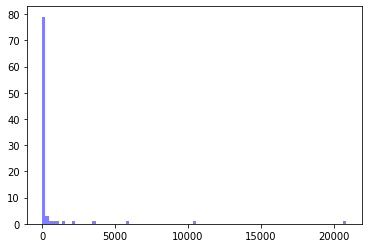

In [13]:
# Looking at 'useful' as a possible feature
max = 0
for index, row in one_star.iterrows():
    if row['useful']>max:
        max = row['useful']
 
useful_frequency = []
for x in range(max +1):
    useful_frequency.append(0)
for x in range(max +1):
    total = 0
    for index, row in one_star.iterrows():
        if row['useful'] == x:
            total += 1
    useful_frequency[x] = total
print(useful_frequency)

num_bins = max+1
n, bins, patches = plt.hist(useful_frequency, num_bins, facecolor='blue', alpha=0.5)
plt.show()